<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-de-données-exploratoire" data-toc-modified-id="Analyse-de-données-exploratoire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse de données exploratoire</a></span><ul class="toc-item"><li><span><a href="#Chargement-des-librairies-utiles" data-toc-modified-id="Chargement-des-librairies-utiles-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chargement des librairies utiles</a></span></li><li><span><a href="#Lecture-de-la-donnée" data-toc-modified-id="Lecture-de-la-donnée-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lecture de la donnée</a></span></li><li><span><a href="#Décrire-la-donnée" data-toc-modified-id="Décrire-la-donnée-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Décrire la donnée</a></span></li><li><span><a href="#Vérifier-les-dimensions-et-les-colonnes-présentes" data-toc-modified-id="Vérifier-les-dimensions-et-les-colonnes-présentes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Vérifier les dimensions et les colonnes présentes</a></span></li><li><span><a href="#Vérifier-la-présence-de-valeurs-manquantes" data-toc-modified-id="Vérifier-la-présence-de-valeurs-manquantes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Vérifier la présence de valeurs manquantes</a></span></li><li><span><a href="#Visualisation-des-données-qualitatives-à-l'aide-de-barplots" data-toc-modified-id="Visualisation-des-données-qualitatives-à-l'aide-de-barplots-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualisation des données qualitatives à l'aide de barplots</a></span></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Analyse bivariée</a></span></li></ul></li><li><span><a href="#Préparation-des-donées" data-toc-modified-id="Préparation-des-donées-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Préparation des donées</a></span><ul class="toc-item"><li><span><a href="#OneHotEncoding-ou-OrdinalEncoding-des-variables-explicatives" data-toc-modified-id="OneHotEncoding-ou-OrdinalEncoding-des-variables-explicatives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OneHotEncoding ou OrdinalEncoding des variables explicatives</a></span></li><li><span><a href="#Séparation-de-la-donnée" data-toc-modified-id="Séparation-de-la-donnée-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Séparation de la donnée</a></span></li><li><span><a href="#Mettez-à-la-même-echelle-les-variables-numériques" data-toc-modified-id="Mettez-à-la-même-echelle-les-variables-numériques-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mettez à la même echelle les variables numériques</a></span></li></ul></li><li><span><a href="#Modèle-simple" data-toc-modified-id="Modèle-simple-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modèle simple</a></span></li></ul></div>

# <center>Prédiction de la Performance Académique des Etudiants à l'Université</center>

![](https://neurosciencenews.com/files/2023/08/chatgpt-student-writing-neuroscoienc.jpg)

## Analyse de données exploratoire

### Chargement des librairies utiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

### Lecture de la donnée

In [3]:
# charger le fichier data/education.csv et afficher les 5 premières lignes
from google.colab import files
uploaded = files.upload()



Saving education.csv to education.csv


In [4]:
education_df = pd.read_csv('education.csv')
education_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<b><p>Attributs</p></b>
1 Gender - sexe de l'étudiant (nominal : « Homme » ou « Femme »)

2 Nqtionqlity - nationalité de l'étudiant (nominal : « Koweït », « Liban », « Égypte », « Arabie Saoudite », « États-Unis », « Jordanie », « Venezuela », « Iran », « Tunis », « Maroc », « Syrie »). ',' Palestine', 'Irak', 'Lybie')

3 Place of birth - Lieu de naissance de l'étudiant (nominal : « Koweït », « Liban », « Égypte », « Arabie Saoudite », « États-Unis », « Jordanie », « Venezuela », « Iran », « Tunis », « Maroc »). ',' Syrie ',' Palestine ', ' Irak ', ' Libye ')

4 Educational Stages - le niveau d'éducation auquel appartient l'élève (nominal : « niveau inférieur », « MiddleSchool », « HighSchool »)

5 Grade Levels : l'élève appartient (nominal : 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07' ', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

6 Section ID - l'élève de la classe appartient (nominal : 'A', 'B', 'C')

7 Topic- sujet du cours (nominal : 'anglais', 'espagnol', 'français', 'arabe', 'informatique', 'mathématiques', 'chimie', 'biologie', 'science', 'histoire', 'Coran ',' Géologie')

8 Semester - semestre de l'année scolaire (nominal : « Premier », « Deuxième »)

9 Relation - Parent responsable de l’élève (nominal : « maman », « père »)

10 Raisedhqnds - combien de fois l'élève lève la main en classe (numérique : 0-100)

11- VisiTedResources - combien de fois l'étudiant visite un contenu de cours (numérique : 0-100)

12 AnnouncementsView - combien de fois l'étudiant vérifie les nouvelles annonces (numérique : 0-100)

13 Discussion  - combien de fois l'étudiant participe à des groupes de discussion (numérique : 0-100)

14 ParentAnsweringSurvey - le parent a répondu aux enquêtes fournies ou non par l'école (nominal : « Oui », « Non »)

15 ParentschoolSatisfaction - le degré de satisfaction des parents à l'égard de l'école (nominal : « Oui », « Non »)

16 StudentAbsenceDays - le nombre de jours d'absence pour chaque étudiant (nominal : au-dessus de 7 ans, moins de 7 ans)

17 Class - Les étudiants sont classés en trois intervalles numériques en fonction de leur note/note totale :
Low-Level (L): l'intervalle comprend des valeurs de 0 à 69,

Middle-Level (M): l'intervalle comprend les valeurs de 70 à 89,

High-Level(H) : l'intervalle comprend des valeurs comprises entre 90 et 100.

### Décrire la donnée


In [13]:
description = education_df.describe(include='all')
print(description)

       gender NationalITy PlaceofBirth       StageID GradeID SectionID Topic  \
count     480         480          480           480     480       480   480   
unique      2          14           14             3      10         3    12   
top         M          KW       KuwaIT  MiddleSchool    G-02         A    IT   
freq      305         179          180           248     147       283    95   
mean      NaN         NaN          NaN           NaN     NaN       NaN   NaN   
std       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
min       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
25%       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
50%       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
75%       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
max       NaN         NaN          NaN           NaN     NaN       NaN   NaN   

       Semester Relation  raisedhands  

In [8]:
#  les types de données
dtypes = education_df.dtypes
print(dtypes)



gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


### Vérifier les dimensions et les colonnes présentes

In [16]:
# Afficher les dimensions du DataFrame
shape = education_df.shape
print(f"Dimensions: {shape}")

Dimensions: (480, 17)


In [11]:
#  les colonnes présentes
columns = education_df.columns
print(columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


### Vérifier la présence de valeurs manquantes

In [15]:
#  la présence de valeurs manquantes
missing_values = education_df.isnull().sum()
print(missing_values)


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


### Visualisation des données qualitatives à l'aide de barplots

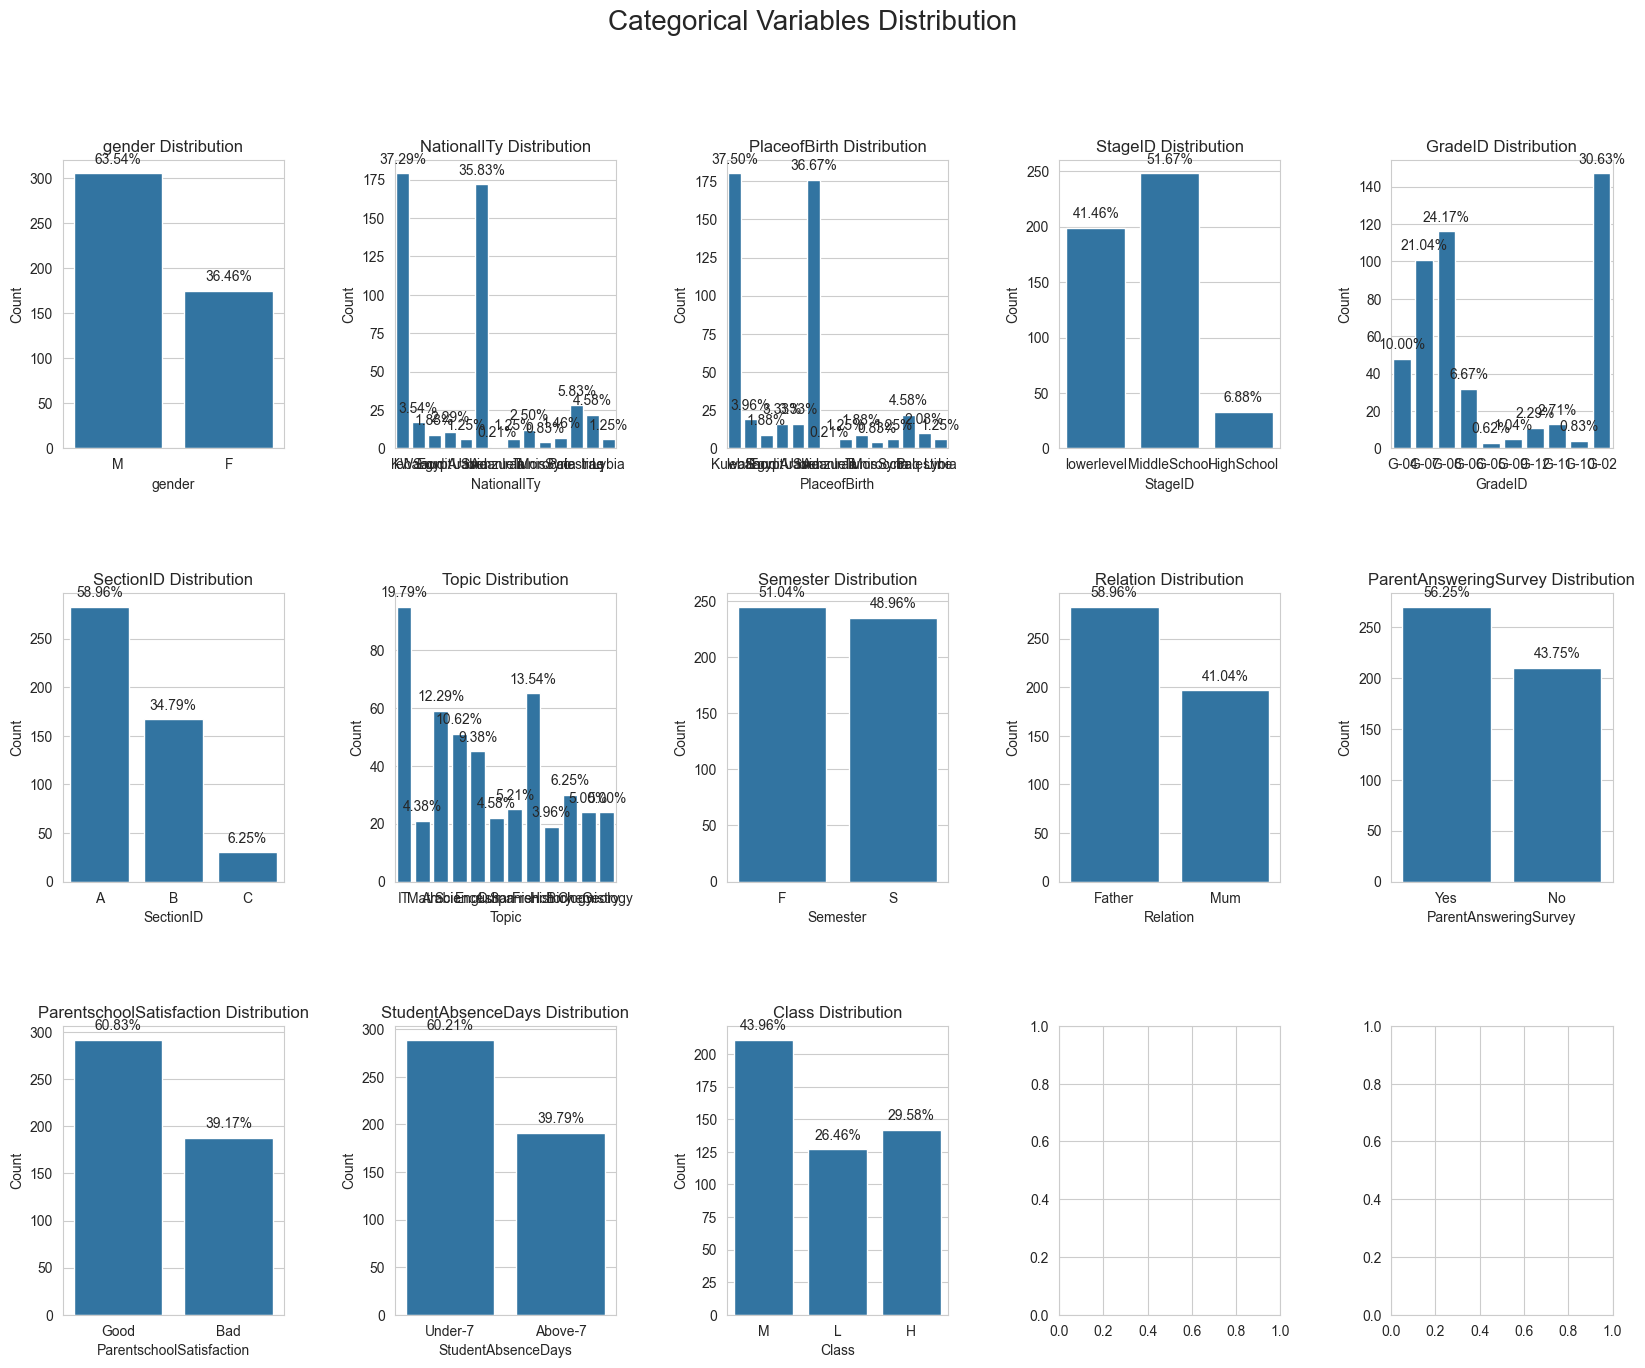

In [ ]:
# Subplots de barplots pour les variables catégorielles avec des labels en pourcentage au-dessus des barres




### Analyse bivariée

# Etudier la relation entre chaque variable et la variable d'intérêt


En analysant les graphiques à barres, on peut observer les tendances suivantes:

Sexe: La distribution du sexe est presque uniforme, avec une légère prépondérance des femmes (37,29%) par rapport aux hommes (36,57%).
Nationalité: La nationalité la plus représentée est le Koweït (37,60%), suivi des États-Unis (25%) et du Royaume-Uni (25%).
Lieu de naissance: La plupart des personnes sont nées dans leur pays de résidence (62,50%), tandis que les autres sont nées dans d'autres pays.
Niveau scolaire: Le niveau scolaire le plus fréquent est le lycée (41,46%), suivi du collège (36,46%) et de l'école primaire (21,04%).
Note: La note la plus fréquente est B (41,04%), suivie de A (34,79%) et C (15,54%).

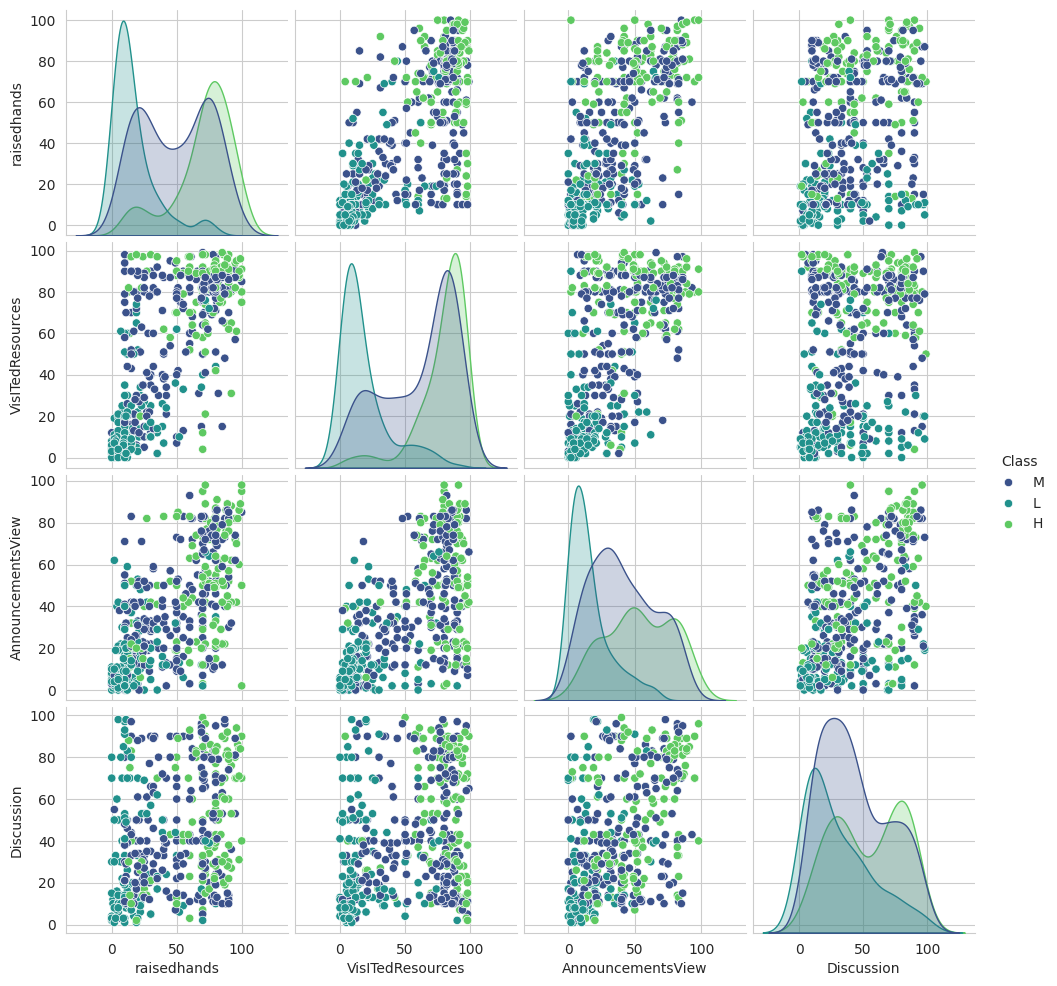

In [18]:
# Réaliser un pairplot pour les variables numériques avec la variable target en  hue

# Définition des variables numériques
numerical_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Création d'un DataFrame avec uniquement les variables numériques et la variable cible
df_numerical = education_df[numerical_features + ['Class']]

# Création le pairplot avec 'Class' comme variable 'hue'
sns.pairplot(df_numerical, hue='Class', palette='viridis')

# Affichage du graphique
plt.show()

## Préparation des donées

### OneHotEncoding ou OrdinalEncoding des variables explicatives

In [23]:

# Chargement du fichier data/education.csv
from google.colab import files
uploaded = files.upload()
education_df = pd.read_csv('education (1).csv')

# Vérification des noms des colonnes
print("Colonnes disponibles :")
print(education_df.columns)

# Liste des variables nominales à encoder
nominal_features = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                     'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                     'ParentschoolSatisfaction', 'StudentAbsenceDays']

#  One-Hot Encoding pour les variables nominales
education_df_encoded = pd.get_dummies(education_df, columns=nominal_features)


# Vérification le DataFrame encodé
print(education_df_encoded.head())

Saving education.csv to education (4).csv
Colonnes disponibles :
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')
   raisedhands  VisITedResources  AnnouncementsView  Discussion Class  \
0           15                16                  2          20     M   
1           20                20                  3          25     M   
2           10                 7                  0          30     L   
3           30                25                  5          35     L   
4           40                50                 12          50     M   

   gender_F  gender_M  NationalITy_Egypt  NationalITy_Iran  NationalITy_Iraq  \
0     False      True              False             False             False   
1     False    

### Séparation de la donnée

In [ ]:
# Séparer les données en features et target
Features, Target = _, _

In [ ]:
# Diviser les données en train(60%), validation(20%) et test(20%)
X_train, X_test, y_train, y_test = _, _, _, _
X_train, X_val, y_train, y_val = _, _, _, _

### Mettez à la même echelle les variables numériques

In [ ]:
scaler = _


## Modèle simple

In [ ]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [ ]:
print(Score)

In [ ]:
print(Report)